# Setup

In [5]:
%matplotlib inline
# Plot everything as SVG
%config InlineBackend.figure_formats=['svg']


import math
import matplotlib.pyplot as plt
from functools import partial
np.random.seed(1)

# for fixing matplotlib's svg clipping
from lxml import etree

# Config styling
#palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
palette = ['#386DF9', '#FFDC52', '#FF1614', '#62F591', '#AA22FF', '#34495E']
muted = '#dcdce6'

# A sans-serif math font fits better, but the spacing for `stixsans` is weird
plt.rcParams['mathtext.fontset'] = 'stixsans'
plt.rcParams.update({'font.size': 18})

def save(name):
    fname = '../notes/assets/{}.svg'.format(name)
    plt.savefig(fname)
    
    # edit the resulting svg to fix clipping issues
    # see <https://github.com/matplotlib/matplotlib/issues/2277>
    with open(fname, 'r') as f:
        raw = f.read()
    svg = etree.fromstring(raw.encode('utf-8'))
    
    # the last <defs> tag contains the clipping info
    defs = [c for c in svg.getchildren() if c.tag == '{http://www.w3.org/2000/svg}defs'][-1]
    
    # move it to the beginning
    svg.insert(0, defs)
    
    # re-write the svg
    with open(fname, 'w') as f:
        raw = etree.tostring(svg, pretty_print=True).decode('utf-8')
        f.write(raw)
        
        
def save_png(name):
    fname = '../notes/assets/{}.png'.format(name)
    plt.savefig(fname, dpi=300)

In [4]:
# http://daft-pgm.org/api/
import daft

def add_node(pgm, name, body, x, y, **kwargs):
    # for consistent scale
    pgm.add_node(daft.Node(name, body, x, y, scale=1.2, **kwargs))
    
def add_edge(pgm, frm, to, label=''):
    # for consistent scale
    if pgm._ctx.directed:
        # ref: <http://matplotlib.org/api/patches_api.html#matplotlib.patches.FancyArrow>
        pgm.add_edge(frm, to, head_length=0.1, head_width=0.15, fill=False, label=label)
    else:
        pgm.add_edge(frm, to)
        
def add_edges(pgm, pairs):
    for pair in pairs:
        if len(pair) == 3:
            frm, to, label = pair
            add_edge(pgm, frm, to, label=label)
        else:
            frm, to = pair
            add_edge(pgm, frm, to)

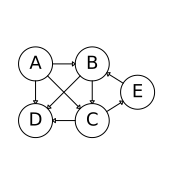

In [3]:
pgm = daft.PGM([3, 3], origin=[-0.5, 0.5])
add_node(pgm, 'A', 'A', 0, 2.5)
add_node(pgm, 'B', 'B', 1, 2.5)
add_node(pgm, 'C', 'C', 1, 1.5)
add_node(pgm, 'D', 'D', 0, 1.5)
add_node(pgm, 'E', 'E', 1.8, 2)
add_edges(pgm, [
        ('A', 'B'),
        ('A', 'D'),
        ('C', 'D'),
        ('A', 'C'),
        ('C', 'E'),
        ('B', 'C'),
        ('B', 'D'),
        ('E', 'B')
    ])
pgm.render()
save('directed')

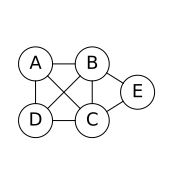

In [4]:
pgm = daft.PGM([3, 3], origin=[-0.5, 0.5], directed=False)
add_node(pgm, 'A', 'A', 0, 2.5)
add_node(pgm, 'B', 'B', 1, 2.5)
add_node(pgm, 'C', 'C', 1, 1.5)
add_node(pgm, 'D', 'D', 0, 1.5)
add_node(pgm, 'E', 'E', 1.8, 2)
add_edges(pgm, [
        ('A', 'B'),
        ('A', 'D'),
        ('C', 'D'),
        ('A', 'C'),
        ('C', 'E'),
        ('B', 'C'),
        ('B', 'D'),
        ('E', 'B')
    ])
pgm.render()
save('undirected')
save('clique_example')

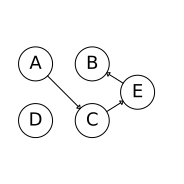

In [5]:
pgm = daft.PGM([3, 3], origin=[-0.5, 0.5])
add_node(pgm, 'A', 'A', 0, 2.5)
add_node(pgm, 'B', 'B', 1, 2.5)
add_node(pgm, 'C', 'C', 1, 1.5)
add_node(pgm, 'D', 'D', 0, 1.5)
add_node(pgm, 'E', 'E', 1.8, 2)
add_edges(pgm, [
        ('A', 'C'),
        ('C', 'E'),
        ('E', 'B'),
    ])
pgm.render()
save('graph_example')

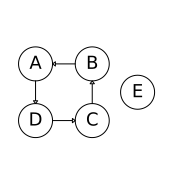

In [6]:
pgm = daft.PGM([3, 3], origin=[-0.5, 0.5])
add_node(pgm, 'A', 'A', 0, 2.5)
add_node(pgm, 'B', 'B', 1, 2.5)
add_node(pgm, 'C', 'C', 1, 1.5)
add_node(pgm, 'D', 'D', 0, 1.5)
add_node(pgm, 'E', 'E', 1.8, 2)
add_edges(pgm, [
        ('B', 'A'),
        ('C', 'B'),
        ('D', 'C'),
        ('A', 'D')
    ])
pgm.render()
save('graph_cycle_example')

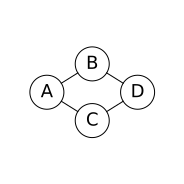

In [7]:
pgm = daft.PGM([3, 3], origin=[-0.5, 0.5], directed=False)
add_node(pgm, 'A', 'A', 0.2, 2)
add_node(pgm, 'B', 'B', 1, 2.5)
add_node(pgm, 'C', 'C', 1, 1.5)
add_node(pgm, 'D', 'D', 1.8, 2)
add_edges(pgm, [
        ('A', 'B'),
        ('B', 'D'),
        ('C', 'D'),
        ('A', 'C')
    ])
pgm.render()
save('maximal_clique')

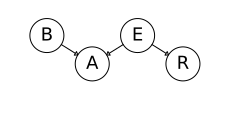

In [8]:
pgm = daft.PGM([4, 2], origin=[-0.5, 0.5])
add_node(pgm, 'B', 'B', 0.2, 2)
add_node(pgm, 'A', 'A', 1, 1.5)
add_node(pgm, 'E', 'E', 1.8, 2)
add_node(pgm, 'R', 'R', 2.6, 1.5)
add_edges(pgm, [
        ('B', 'A'),
        ('E', 'A'),
        ('E', 'R'),
    ])
pgm.render()
save('simple_belief_net')

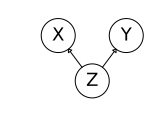

In [9]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'X', 'X', 0.4, 2)
add_node(pgm, 'Z', 'Z', 1, 1.2)
add_node(pgm, 'Y', 'Y', 1.6, 2)
add_edges(pgm, [
        ('Z', 'X'),
        ('Z', 'Y'),
    ])
pgm.render()
save('bn_triple_00')

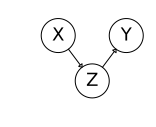

In [10]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'X', 'X', 0.4, 2)
add_node(pgm, 'Z', 'Z', 1, 1.2)
add_node(pgm, 'Y', 'Y', 1.6, 2)
add_edges(pgm, [
        ('X', 'Z'),
        ('Z', 'Y'),
    ])
pgm.render()
save('bn_triple_01')

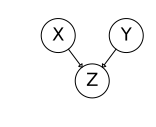

In [11]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'X', 'X', 0.4, 2)
add_node(pgm, 'Z', 'Z', 1, 1.2)
add_node(pgm, 'Y', 'Y', 1.6, 2)
add_edges(pgm, [
        ('X', 'Z'),
        ('Y', 'Z'),
    ])
pgm.render()
save('bn_triple_02')

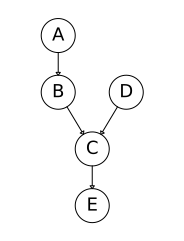

In [12]:
pgm = daft.PGM([3, 4], origin=[-0.5, 0.5])
add_node(pgm, 'A', 'A', 0.4, 4)
add_node(pgm, 'B', 'B', 0.4, 3)
add_node(pgm, 'C', 'C', 1, 2)
add_node(pgm, 'D', 'D', 1.6, 3)
add_node(pgm, 'E', 'E', 1, 1)
add_edges(pgm, [
        ('A', 'B'),
        ('B', 'C'),
        ('D', 'C'),
        ('C', 'E')
    ])
pgm.render()
save('collider_example')

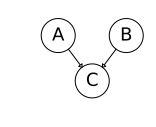

In [13]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'A', 'A', 0.4, 2)
add_node(pgm, 'C', 'C', 1, 1.2)
add_node(pgm, 'B', 'B', 1.6, 2)
add_edges(pgm, [
        ('A', 'C'),
        ('B', 'C'),
    ])
pgm.render()
save('bn_prop_00')

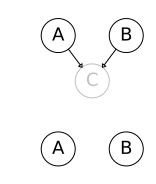

In [14]:
pgm = daft.PGM([2.5, 3], origin=[-0.5, 0.5])
add_node(pgm, 'A', 'A', 0.4, 3)
add_node(pgm, 'C', 'C', 1, 2.2,  plot_params={'alpha': 0.25}, label_params={'alpha': 0.25})
add_node(pgm, 'B', 'B', 1.6, 3)
add_node(pgm, 'A2', 'A', 0.4, 1)
add_node(pgm, 'B2', 'B', 1.6, 1)
add_edges(pgm, [
        ('A', 'C'),
        ('B', 'C'),
    ])
pgm.render()
save('bn_prop_01')

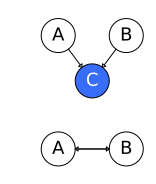

In [15]:
pgm = daft.PGM([2.5, 3], origin=[-0.5, 0.5])
add_node(pgm, 'A', 'A', 0.4, 3)
add_node(pgm, 'C', 'C', 1, 2.2,  plot_params={'facecolor': '#386DF9'}, label_params={'color': 'w'})
add_node(pgm, 'B', 'B', 1.6, 3)
add_node(pgm, 'A2', 'A', 0.4, 1)
add_node(pgm, 'B2', 'B', 1.6, 1)
add_edges(pgm, [
        ('A', 'C'),
        ('B', 'C'),
        ('A2', 'B2'),
        ('B2', 'A2')
    ])
pgm.render()
save('bn_prop_02')

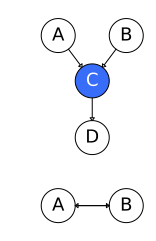

In [16]:
pgm = daft.PGM([2.5, 4], origin=[-0.5, 0.5])
add_node(pgm, 'A', 'A', 0.4, 4)
add_node(pgm, 'C', 'C', 1, 3.2,  plot_params={'facecolor': '#386DF9'}, label_params={'color': 'w'})
add_node(pgm, 'B', 'B', 1.6, 4)
add_node(pgm, 'D', 'D', 1, 2.2)
add_node(pgm, 'A2', 'A', 0.4, 1)
add_node(pgm, 'B2', 'B', 1.6, 1)
add_edges(pgm, [
        ('A', 'C'),
        ('B', 'C'),
        ('C', 'D'),
        ('A2', 'B2'),
        ('B2', 'A2')
    ])
pgm.render()
save('bn_prop_03')

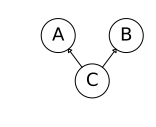

In [17]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'A', 'A', 0.4, 2)
add_node(pgm, 'C', 'C', 1, 1.2)
add_node(pgm, 'B', 'B', 1.6, 2)
add_edges(pgm, [
        ('C', 'A'),
        ('C', 'B'),
    ])
pgm.render()
save('bn_prop_04')

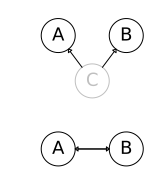

In [18]:
pgm = daft.PGM([2.5, 3], origin=[-0.5, 0.5])
add_node(pgm, 'A', 'A', 0.4, 3)
add_node(pgm, 'C', 'C', 1, 2.2,  plot_params={'alpha': 0.25}, label_params={'alpha': 0.25})
add_node(pgm, 'B', 'B', 1.6, 3)
add_node(pgm, 'A2', 'A', 0.4, 1)
add_node(pgm, 'B2', 'B', 1.6, 1)
add_edges(pgm, [
        ('C', 'A'),
        ('C', 'B'),
        ('A2', 'B2'),
        ('B2', 'A2')
    ])
pgm.render()
save('bn_prop_05')

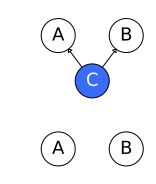

In [19]:
pgm = daft.PGM([2.5, 3], origin=[-0.5, 0.5])
add_node(pgm, 'A', 'A', 0.4, 3)
add_node(pgm, 'C', 'C', 1, 2.2,  plot_params={'facecolor': '#386DF9'}, label_params={'color': 'w'})
add_node(pgm, 'B', 'B', 1.6, 3)
add_node(pgm, 'A2', 'A', 0.4, 1)
add_node(pgm, 'B2', 'B', 1.6, 1)
add_edges(pgm, [
        ('C', 'A'),
        ('C', 'B'),
    ])
pgm.render()
save('bn_prop_06')

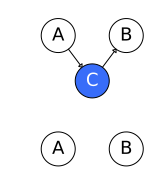

In [20]:
pgm = daft.PGM([2.5, 3], origin=[-0.5, 0.5])
add_node(pgm, 'A', 'A', 0.4, 3)
add_node(pgm, 'C', 'C', 1, 2.2,  plot_params={'facecolor': '#386DF9'}, label_params={'color': 'w'})
add_node(pgm, 'B', 'B', 1.6, 3)
add_node(pgm, 'A2', 'A', 0.4, 1)
add_node(pgm, 'B2', 'B', 1.6, 1)
add_edges(pgm, [
        ('A', 'C'),
        ('C', 'B'),
    ])
pgm.render()
save('bn_prop_07')

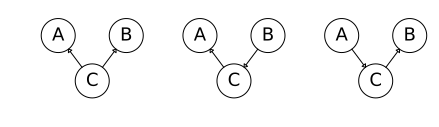

In [21]:
pgm = daft.PGM([7.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'A', 'A', 0.4, 2)
add_node(pgm, 'C', 'C', 1, 1.2)
add_node(pgm, 'B', 'B', 1.6, 2)
add_node(pgm, 'A2', 'A', 2.9, 2)
add_node(pgm, 'C2', 'C', 3.5, 1.2)
add_node(pgm, 'B2', 'B', 4.1, 2)
add_node(pgm, 'A3', 'A', 5.4, 2)
add_node(pgm, 'C3', 'C', 6, 1.2)
add_node(pgm, 'B3', 'B', 6.6, 2)
add_edges(pgm, [
        ('C', 'A'),
        ('C', 'B'),
        ('C2', 'A2'),
        ('B2', 'C2'),
        ('A3', 'C3'),
        ('C3', 'B3')
    ])
pgm.render()
save('bn_prop_08')

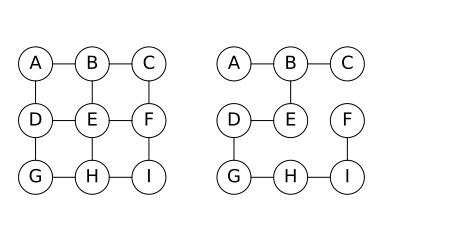

In [22]:
pgm = daft.PGM([8, 4], origin=[-0.5, 0.5], directed=False)
add_node(pgm, 'A', 'A', 0, 3.5)
add_node(pgm, 'B', 'B', 1, 3.5)
add_node(pgm, 'C', 'C', 2, 3.5)
add_node(pgm, 'D', 'D', 0, 2.5)
add_node(pgm, 'E', 'E', 1, 2.5)
add_node(pgm, 'F', 'F', 2, 2.5)
add_node(pgm, 'G', 'G', 0, 1.5)
add_node(pgm, 'H', 'H', 1, 1.5)
add_node(pgm, 'I', 'I', 2, 1.5)

add_edges(pgm, [
        ('A', 'B'),
        ('B', 'C'),
        ('A', 'D'),
        ('B', 'E'),
        ('C', 'F'),
        ('D', 'E'),
        ('E', 'F'),
        ('D', 'G'),
        ('E', 'H'),
        ('F', 'I'),
        ('G', 'H'),
        ('H', 'I')
    ])

add_node(pgm, 'A2', 'A', 3.5, 3.5)
add_node(pgm, 'B2', 'B', 4.5, 3.5)
add_node(pgm, 'C2', 'C', 5.5, 3.5)
add_node(pgm, 'D2', 'D', 3.5, 2.5)
add_node(pgm, 'E2', 'E', 4.5, 2.5)
add_node(pgm, 'F2', 'F', 5.5, 2.5)
add_node(pgm, 'G2', 'G', 3.5, 1.5)
add_node(pgm, 'H2', 'H', 4.5, 1.5)
add_node(pgm, 'I2', 'I', 5.5, 1.5)

add_edges(pgm, [
        ('A2', 'B2'),
        ('B2', 'C2'),
        ('B2', 'E2'),
        ('D2', 'E2'),
        ('D2', 'G2'),
        ('G2', 'H2'),
        ('H2', 'I2'),
        ('I2', 'F2'),
    ])
pgm.render()
save('spanning_tree')

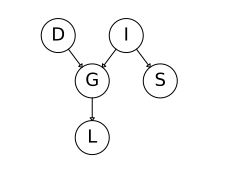

In [23]:
pgm = daft.PGM([4, 3], origin=[-0.5, 0.5])
add_node(pgm, 'D', 'D', 0.4, 3)
add_node(pgm, 'G', 'G', 1, 2.2)
add_node(pgm, 'I', 'I', 1.6, 3)
add_node(pgm, 'L', 'L', 1, 1.2)
add_node(pgm, 'S', 'S', 2.2, 2.2)
add_edges(pgm, [
        ('D', 'G'),
        ('I', 'G'),
        ('I', 'S'),
        ('G', 'L')
    ])
pgm.render()
save('bn_example_00')

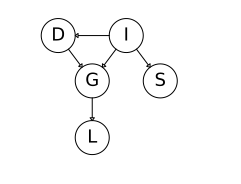

In [24]:
pgm = daft.PGM([4, 3], origin=[-0.5, 0.5])
add_node(pgm, 'D', 'D', 0.4, 3)
add_node(pgm, 'G', 'G', 1, 2.2)
add_node(pgm, 'I', 'I', 1.6, 3)
add_node(pgm, 'L', 'L', 1, 1.2)
add_node(pgm, 'S', 'S', 2.2, 2.2)
add_edges(pgm, [
        ('D', 'G'),
        ('I', 'G'),
        ('I', 'S'),
        ('G', 'L'),
        ('I', 'D')
    ])
pgm.render()
save('bn_example_01')

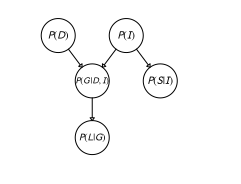

In [25]:
pgm = daft.PGM([4, 3], origin=[-0.5, 0.5])
add_node(pgm, 'D', '$P(D)$', 0.4, 3, label_params={'size':11})
add_node(pgm, 'G', '$P(G\,|D,I)$', 1, 2.2, label_params={'size':9})
add_node(pgm, 'I', '$P(I)$', 1.6, 3, label_params={'size':11})
add_node(pgm, 'L', '$P(L|G)$', 1, 1.2, label_params={'size':10})
add_node(pgm, 'S', '$P(S|I)$', 2.2, 2.2, label_params={'size': 11})
add_edges(pgm, [
        ('D', 'G'),
        ('I', 'G'),
        ('I', 'S'),
        ('G', 'L')
    ])
pgm.render()
save('bn_example_02')

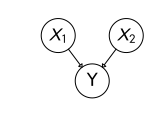

In [26]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'X_1', '$X_1$', 0.4, 2)
add_node(pgm, 'Y', 'Y', 1, 1.2)
add_node(pgm, 'X_2', '$X_2$', 1.6, 2)
add_edges(pgm, [
        ('X_1', 'Y'),
        ('X_2', 'Y'),
    ])
pgm.render()
save('bn_or_gate')

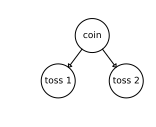

In [27]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'X_1', 'toss 1', 0.4, 1.2, label_params={'size':9})
add_node(pgm, 'Y', 'coin', 1, 2, label_params={'size':9})
add_node(pgm, 'X_2', 'toss 2', 1.6, 1.2, label_params={'size':9})
add_edges(pgm, [
        ('Y', 'X_1'),
        ('Y', 'X_2'),
    ])
pgm.render()
save('bn_coin_toss')

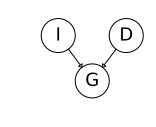

In [28]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'I', 'I', 0.4, 2)
add_node(pgm, 'G', 'G', 1, 1.2)
add_node(pgm, 'D', 'D', 1.6, 2)
add_edges(pgm, [
        ('I', 'G'),
        ('D', 'G'),
    ])
pgm.render()
save('bn_student_or')

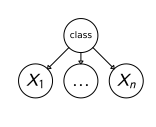

In [29]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'X_1', '$X_1$', 0, 1.2)
add_node(pgm, 'c', 'class', 0.8, 2, label_params={'size':9})
add_node(pgm, 'X', '$\dots$', 0.8, 1.2)
add_node(pgm, 'X_n', '$X_n$', 1.6, 1.2)
add_edges(pgm, [
        ('c', 'X_1'),
        ('c', 'X_n'),
        ('c', 'X')
    ])
pgm.render()
save('bn_naive_bayes')

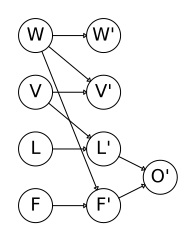

In [30]:
pgm = daft.PGM([3.2, 4], origin=[-0.5, 0.5])
add_node(pgm, 'W', 'W', 0, 4)
add_node(pgm, 'W_', 'W\'', 1.2, 4)
add_node(pgm, 'V', 'V', 0, 3)
add_node(pgm, 'V_', 'V\'', 1.2, 3)
add_node(pgm, 'L', 'L', 0, 2)
add_node(pgm, 'L_', 'L\'', 1.2, 2)
add_node(pgm, 'F', 'F', 0, 1)
add_node(pgm, 'F_', 'F\'', 1.2, 1)
add_node(pgm, 'O_', 'O\'', 2.2, 1.5)
add_edges(pgm, [
        ('W', 'W_'),
        ('W', 'V_'),
        ('W', 'F_'),
        ('V', 'V_'),
        ('V', 'L_'),
        ('L', 'L_'),
        ('F', 'F_'),
        ('L_', 'O_'),
        ('F_', 'O_')
    ])
pgm.render()
save('bn_temporal_ex_00')

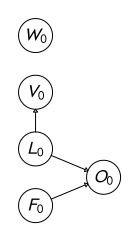

In [31]:
pgm = daft.PGM([2.2, 4], origin=[-0.5, 0.5])
add_node(pgm, 'W', '$W_0$', 0, 4)
add_node(pgm, 'V', '$V_0$', 0, 3)
add_node(pgm, 'L', '$L_0$', 0, 2)
add_node(pgm, 'F', '$F_0$', 0, 1)
add_node(pgm, 'O', '$O_0$', 1.2, 1.5)
add_edges(pgm, [
        ('L', 'V'),
        ('L', 'O'),
        ('F', 'O'),
    ])
pgm.render()
save('bn_temporal_ex_01')

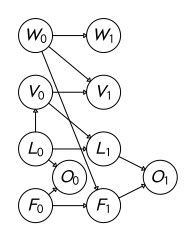

In [32]:
pgm = daft.PGM([3.2, 4], origin=[-0.5, 0.5])
add_node(pgm, 'W', '$W_0$', 0, 4)
add_node(pgm, 'W_', '$W_1$', 1.2, 4)
add_node(pgm, 'V', '$V_0$', 0, 3)
add_node(pgm, 'V_', '$V_1$', 1.2, 3)
add_node(pgm, 'L', '$L_0$', 0, 2)
add_node(pgm, 'L_', '$L_1$', 1.2, 2)
add_node(pgm, 'F', '$F_0$', 0, 1)
add_node(pgm, 'F_', '$F_1$', 1.2, 1)
add_node(pgm, 'O', '$O_0$', 0.6, 1.5)
add_node(pgm, 'O_', '$O_1$', 2.2, 1.5)
add_edges(pgm, [
        ('W', 'W_'),
        ('W', 'V_'),
        ('W', 'F_'),
        ('V', 'V_'),
        ('V', 'L_'),
        ('L', 'L_'),
        ('F', 'F_'),
        ('L_', 'O_'),
        ('F_', 'O_'),
        ('L', 'V'),
        ('L', 'O'),
        ('F', 'O')
    ])
pgm.render()
save('bn_temporal_ex_02')

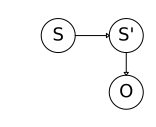

In [33]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'S', 'S', 0.4, 2)
add_node(pgm, 'S_', 'S\'', 1.6, 2)
add_node(pgm, 'O', 'O', 1.6, 1)
add_edges(pgm, [
        ('S', 'S_'),
        ('S_', 'O'),
    ])
pgm.render()
save('bn_simple_hmm')

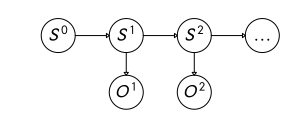

In [34]:
pgm = daft.PGM([5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'S', '$S^0$', 0.4, 2)
add_node(pgm, 'S1', '$S^1$', 1.6, 2)
add_node(pgm, 'O1', '$O^1$', 1.6, 1)
add_node(pgm, 'S2', '$S^2$', 2.8, 2)
add_node(pgm, 'O2', '$O^2$', 2.8, 1)
add_node(pgm, 'dots', '$\dots$', 4, 2)
add_edges(pgm, [
        ('S', 'S1'),
        ('S1', 'O1'),
        ('S1', 'S2'),
        ('S2', 'O2'),
        ('S2', 'dots')
    ])
pgm.render()
save('bn_simple_hmm_unrolled')

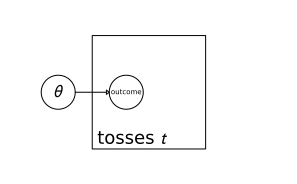

In [35]:
pgm = daft.PGM([5, 3], origin=[-0.5, 0.5])
add_node(pgm, 't', r'$\theta$', 0.4, 2)
add_node(pgm, 'o', 'outcome', 1.6, 2, label_params={'size':7})
add_edges(pgm, [
        ('t', 'o'),
    ])
pgm.add_plate(daft.Plate((1,1,2,2), label='tosses $t$'))
pgm.render()
save('bn_plate_model')

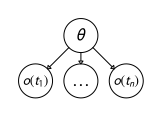

In [36]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'o1', '$o(t_1)$', 0, 1.2, label_params={'size':14})
add_node(pgm, 't', r'$\theta$', 0.8, 2)
add_node(pgm, 'd', '$\dots$', 0.8, 1.2)
add_node(pgm, 'on', '$o(t_n)$', 1.6, 1.2, label_params={'size':14})
add_edges(pgm, [
        ('t', 'o1'),
        ('t', 'on'),
        ('t', 'd')
    ])
pgm.render()
save('bn_plate_model_alt')

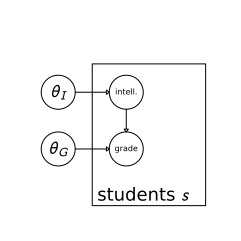

In [37]:
pgm = daft.PGM([4, 4], origin=[-0.5, 0.5])
add_node(pgm, 'tI', r'$\theta_I$', 0.4, 3)
add_node(pgm, 'I', 'intell.', 1.6, 3, label_params={'size':8})
add_node(pgm, 'tG', r'$\theta_G$', 0.4, 2)
add_node(pgm, 'G', 'grade', 1.6, 2, label_params={'size':8})
add_edges(pgm, [
        ('tI', 'I'),
        ('tG', 'G'),
        ('I', 'G')
    ])
pgm.add_plate(daft.Plate((1,1,2,2.5), label='students $s$'))
pgm.render()
save('bn_plate_model_02')

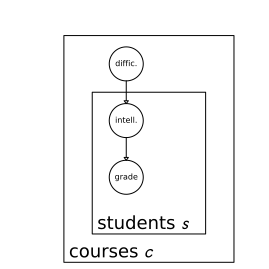

In [38]:
pgm = daft.PGM([4.5, 4.5], origin=[-0.5, 0.5])
add_node(pgm, 'I', 'intell.', 1.6, 3, label_params={'size':8})
add_node(pgm, 'D', 'diffic.', 1.6, 4, label_params={'size':8})
add_node(pgm, 'G', 'grade', 1.6, 2, label_params={'size':8})
add_edges(pgm, [
        ('I', 'G'),
        ('D', 'I')
    ])
pgm.add_plate(daft.Plate((1,1,2,2.5), label='students $s$'))
pgm.add_plate(daft.Plate((0.5,0.5,3,4), label='courses $c$'))
pgm.render()
save('bn_plate_model_02_nested')

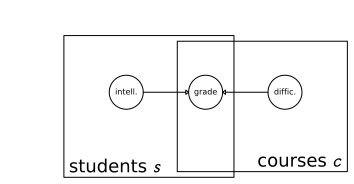

In [39]:
pgm = daft.PGM([6, 3], origin=[-0.5, 0.5])
add_node(pgm, 'I', 'intell.', 1.6, 2, label_params={'size':8})
add_node(pgm, 'D', 'diffic.', 4.4, 2, label_params={'size':8})
add_node(pgm, 'G', 'grade', 3, 2, label_params={'size':8})
add_edges(pgm, [
        ('I', 'G'),
        ('D', 'G')
    ])
pgm.add_plate(daft.Plate((0.5,0.5,3,2.5), label='students $s$'))
pgm.add_plate(daft.Plate((2.5,0.6,3,2.3), label='courses $c$', label_offset=(80, 5)))
pgm.render()
save('bn_plate_model_02_overlapping')

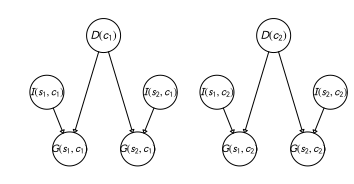

In [40]:
pgm = daft.PGM([6, 3], origin=[-0.5, 0.5])
add_node(pgm, 'Dc1', '$D(c_1)$', 1.2, 3, label_params={'size':12})
add_node(pgm, 'Gs1c1', '$G(s_1, c_1)$', 0.6, 1, label_params={'size':11})
add_node(pgm, 'Gs2c1', '$G(s_2, c_1)$', 1.8, 1, label_params={'size':11})
add_node(pgm, 'Is1c1', '$I(s_1, c_1)$', 0.2, 2, label_params={'size':11})
add_node(pgm, 'Is2c1', '$I(s_2, c_1)$', 2.2, 2, label_params={'size':11})
add_node(pgm, 'Dc2', '$D(c_2)$', 4.2, 3, label_params={'size':12})
add_node(pgm, 'Gs1c2', '$G(s_1, c_2)$', 3.6, 1, label_params={'size':11})
add_node(pgm, 'Gs2c2', '$G(s_2, c_2)$', 4.8, 1, label_params={'size':11})
add_node(pgm, 'Is1c2', '$I(s_1, c_2)$', 3.2, 2, label_params={'size':11})
add_node(pgm, 'Is2c2', '$I(s_2, c_2)$', 5.2, 2, label_params={'size':11})
add_edges(pgm, [
        ('Dc1', 'Gs1c1'),
        ('Is1c1', 'Gs1c1'),
        ('Dc1', 'Gs2c1'),
        ('Is2c1', 'Gs2c1'),
        ('Dc2', 'Gs1c2'),
        ('Is1c2', 'Gs1c2'),
        ('Dc2', 'Gs2c2'),
        ('Is2c2', 'Gs2c2')
    ])
pgm.render()
save('bn_plate_model_02_unrolled')

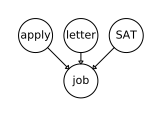

In [41]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'a', 'apply', 0, 2, label_params={'size':11})
add_node(pgm, 'j', 'job', 0.8, 1.2, label_params={'size':11})
add_node(pgm, 'l', 'letter', 0.8, 2, label_params={'size':11})
add_node(pgm, 's', 'SAT', 1.6, 2, label_params={'size':11})
add_edges(pgm, [
        ('a', 'j'),
        ('l', 'j'),
        ('s', 'j')
    ])
pgm.render()
save('bn_tree_cpd_00')

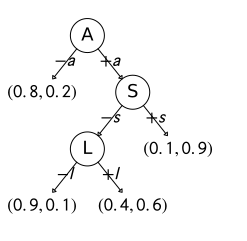

In [42]:
pgm = daft.PGM([4, 4], origin=[-0.5, 0.5])
add_node(pgm, 'a', 'A', 0.8, 4)
add_node(pgm, 't1', '$(0.8, 0.2)$', 0, 3, plot_params={'edgecolor': 'none'})
add_node(pgm, 'l', 'L', 0.8, 2)
add_node(pgm, 's', 'S', 1.6, 3)
add_node(pgm, 't2', '$(0.1, 0.9)$', 2.4, 2, plot_params={'edgecolor': 'none'})
add_node(pgm, 't3', '$(0.9, 0.1)$', 0, 1, plot_params={'edgecolor': 'none'})
add_node(pgm, 't4', '$(0.4, 0.6)$', 1.6, 1, plot_params={'edgecolor': 'none'})
add_edges(pgm, [
        ('a', 's', '$+a$'),
        ('s', 'l', '$-s$'),
        ('a', 't1', '$-a$'),
        ('s', 't2', '$+s$'),
        ('l', 't3', '$-l$'),
        ('l', 't4', '$+l$')
    ])
pgm.render()
save('bn_tree_cpd_01')

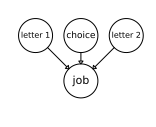

In [43]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'l1', 'letter 1', 0, 2, label_params={'size':8})
add_node(pgm, 'j', 'job', 0.8, 1.2, label_params={'size':11})
add_node(pgm, 'c', 'choice', 0.8, 2, label_params={'size':9})
add_node(pgm, 'l2', 'letter 2', 1.6, 2, label_params={'size':8})
add_edges(pgm, [
        ('l2', 'j'),
        ('c', 'j'),
        ('l1', 'j')
    ])
pgm.render()
save('bn_tree_cpd_02')

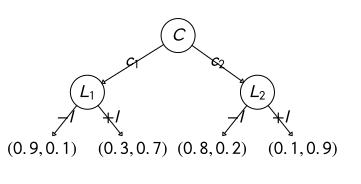

In [44]:
pgm = daft.PGM([6, 3], origin=[-0.5, 0.5])
add_node(pgm, 'c', '$C$', 2.4, 3)
add_node(pgm, 'l1', '$L_1$', 0.8, 2)
add_node(pgm, 'l2', '$L_2$', 3.8, 2)
add_node(pgm, 't1', '$(0.9,0.1)$', 0, 1, plot_params={'edgecolor': 'none'})
add_node(pgm, 't2', '$(0.3,0.7)$', 1.6, 1, plot_params={'edgecolor': 'none'})
add_node(pgm, 't3', '$(0.8,0.2)$', 3, 1, plot_params={'edgecolor': 'none'})
add_node(pgm, 't4', '$(0.1,0.9)$', 4.6, 1, plot_params={'edgecolor': 'none'})
add_edges(pgm, [
        ('c', 'l1', '$c_1$'),
        ('c', 'l2', '$c_2$'),
        ('l1', 't1', '$-l$'),
        ('l1', 't2', '$+l$'),
        ('l2', 't3', '$-l$'),
        ('l2', 't4', '$+l$')

    ])
pgm.render()
save('bn_tree_cpd_03')

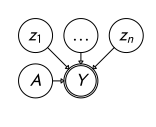

In [45]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5], observed_style='inner')
add_node(pgm, 'z1', '$z_1$', 0, 2)
add_node(pgm, 'z', r'$\dots$', 0.8, 2)
add_node(pgm, 'zn', '$z_n$', 1.6, 2)
add_node(pgm, 'Y', '$Y$', 0.8, 1.2, observed=True)
add_node(pgm, 'A', '$A$', 0, 1.2)
add_edges(pgm, [
        ('z1', 'Y'),
        ('z', 'Y'),
        ('zn', 'Y'),
        ('A', 'Y')
    ])
pgm.render()
save('bn_multiplexer_cpd')

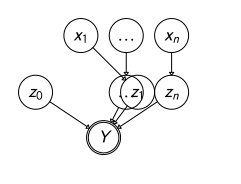

In [46]:
pgm = daft.PGM([4, 3], origin=[-0.5, 0.5], observed_style='inner')
add_node(pgm, 'z0', '$z_0$', 0, 2)
add_node(pgm, 'z1', '$z_1$', 1.8, 2)
add_node(pgm, 'z', r'$\dots$', 1.6, 2)
add_node(pgm, 'zn', '$z_n$', 2.4, 2)
add_node(pgm, 'x1', '$x_1$', 0.8, 3)
add_node(pgm, 'x', r'$\dots$', 1.6, 3)
add_node(pgm, 'xn', '$x_n$', 2.4, 3)
add_node(pgm, 'Y', '$Y$', 1.2, 1.2, observed=True)
add_edges(pgm, [
        ('z1', 'Y'),
        ('z', 'Y'),
        ('zn', 'Y'),
        ('z0', 'Y'),
        ('x1', 'z1'),
        ('x', 'z'),
        ('xn', 'zn')
    ])
pgm.render()
save('bn_noisy_or_cpd')

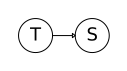

In [47]:
pgm = daft.PGM([2, 1], origin=[-0.5, 0.5])
add_node(pgm, 't', 'T', 0, 1)
add_node(pgm, 's', 'S', 1, 1)
add_edges(pgm, [
        ('t', 's'),
    ])
pgm.render()
save('bn_continuous_ex_00')

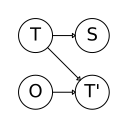

In [48]:
pgm = daft.PGM([2, 2], origin=[-0.5, 0.5])
add_node(pgm, 't', 'T', 0, 2)
add_node(pgm, 's', 'S', 1, 2)
add_node(pgm, 't_', 'T\'', 1, 1)
add_node(pgm, 'o', 'O', 0, 1)
add_edges(pgm, [
        ('t', 's'),
        ('t', 't_'),
        ('o', 't_')
    ])
pgm.render()
save('bn_continuous_ex_01')

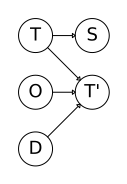

In [49]:
pgm = daft.PGM([2, 3], origin=[-0.5, 0.5])
add_node(pgm, 't', 'T', 0, 3)
add_node(pgm, 's', 'S', 1, 3)
add_node(pgm, 't_', 'T\'', 1, 2)
add_node(pgm, 'o', 'O', 0, 2)
add_node(pgm, 'd', 'D', 0, 1)
add_edges(pgm, [
        ('t', 's'),
        ('t', 't_'),
        ('o', 't_'),
        ('d', 't_')
    ])
pgm.render()
save('bn_continuous_ex_02')

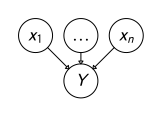

In [50]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'x1', '$x_1$', 0, 2)
add_node(pgm, 'x', r'$\dots$', 0.8, 2)
add_node(pgm, 'xn', '$x_n$', 1.6, 2)
add_node(pgm, 'Y', '$Y$', 0.8, 1.2)
add_edges(pgm, [
        ('x1', 'Y'),
        ('x', 'Y'),
        ('xn', 'Y'),
    ])
pgm.render()
save('bn_linear_gaussian')

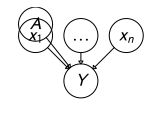

In [51]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'x1', '$x_1$', 0, 2)
add_node(pgm, 'x', r'$\dots$', 0.8, 2)
add_node(pgm, 'xn', '$x_n$', 1.6, 2)
add_node(pgm, 'Y', '$Y$', 0.8, 1.2)
add_node(pgm, 'A', '$A$', 0, 2.2)
add_edges(pgm, [
        ('x1', 'Y'),
        ('x', 'Y'),
        ('xn', 'Y'),
        ('A', 'Y')
    ])
pgm.render()
save('bn_conditional_linear_gaussian')

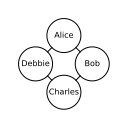

In [52]:
pgm = daft.PGM([2, 2], origin=[-0.5, 0.5], directed=False)
add_node(pgm, 'a', 'Alice', 0.5, 2, label_params={'size':8})
add_node(pgm, 'b', 'Bob', 1, 1.5, label_params={'size':8})
add_node(pgm, 'c', 'Charles', 0.5, 1, label_params={'size':8})
add_node(pgm, 'd', 'Debbie', 0, 1.5, label_params={'size':8})
add_edges(pgm, [
        ('a', 'b'),
        ('d', 'a'),
        ('b', 'c'),
        ('c', 'd')
    ])
pgm.render()
save('markov_network_00')

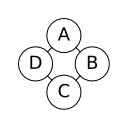

In [53]:
pgm = daft.PGM([2, 2], origin=[-0.5, 0.5], directed=False)
add_node(pgm, 'a', 'A', 0.5, 2)
add_node(pgm, 'b', 'B', 1, 1.5)
add_node(pgm, 'c', 'C', 0.5, 1)
add_node(pgm, 'd', 'D', 0, 1.5)
add_edges(pgm, [
        ('a', 'b'),
        ('d', 'a'),
        ('b', 'c'),
        ('c', 'd')
    ])
pgm.render()
save('markov_network_01')

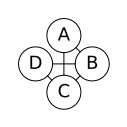

In [54]:
pgm = daft.PGM([2, 2], origin=[-0.5, 0.5], directed=False)
add_node(pgm, 'a', 'A', 0.5, 2)
add_node(pgm, 'b', 'B', 1, 1.5)
add_node(pgm, 'c', 'C', 0.5, 1)
add_node(pgm, 'd', 'D', 0, 1.5)
add_edges(pgm, [
        ('a', 'b'),
        ('b', 'c'),
        ('c', 'd'),
        ('b', 'd'),
        ('a', 'c')
    ])
pgm.render()
save('markov_network_induced')

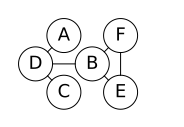

In [55]:
pgm = daft.PGM([3, 2], origin=[-0.5, 0.5], directed=False)
add_node(pgm, 'a', 'A', 0.5, 2)
add_node(pgm, 'b', 'B', 1, 1.5)
add_node(pgm, 'c', 'C', 0.5, 1)
add_node(pgm, 'd', 'D', 0, 1.5)
add_node(pgm, 'e', 'E', 1.5, 1)
add_node(pgm, 'f', 'F', 1.5, 2)
add_edges(pgm, [
        ('d', 'a'),
        ('c', 'd'),
        ('b', 'd'),
        ('b', 'f'),
        ('b', 'e'),
        ('f', 'e')
    ])
pgm.render()
save('markov_network_separation')

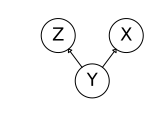

In [58]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'Z', 'Z', 0.4, 2)
add_node(pgm, 'Y', 'Y', 1, 1.2)
add_node(pgm, 'X', 'X', 1.6, 2)
add_edges(pgm, [
        ('Y', 'X'),
        ('Y', 'Z'),
    ])
pgm.render()
save('common_cause')

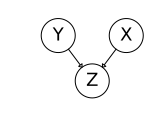

In [7]:
pgm = daft.PGM([2.5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'Y', 'Y', 0.4, 2)
add_node(pgm, 'Z', 'Z', 1, 1.2)
add_node(pgm, 'X', 'X', 1.6, 2)
add_edges(pgm, [
        ('X', 'Z'),
        ('Y', 'Z'),
    ])
pgm.render()
save('common_effect')

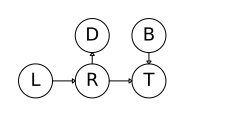

In [13]:
pgm = daft.PGM([4, 2], origin=[-0.5, 0.5])
add_node(pgm, 'L', 'L', 0, 1.2)
add_node(pgm, 'R', 'R', 1, 1.2)
add_node(pgm, 'D', 'D', 1, 2)
add_node(pgm, 'T', 'T', 2, 1.2)
add_node(pgm, 'B', 'B', 2, 2)
add_edges(pgm, [
        ('L', 'R'),
        ('R', 'D'),
        ('R', 'T'),
        ('B', 'T')
    ])
pgm.render()
save('example_bayes_net_01')

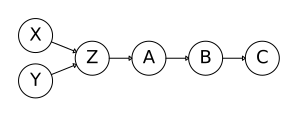

In [19]:
pgm = daft.PGM([5, 2], origin=[-0.5, 0.5])
add_node(pgm, 'X', 'X', 0, 2)
add_node(pgm, 'Y', 'Y', 0, 1.2)
add_node(pgm, 'Z', 'Z', 1, 1.6)
add_node(pgm, 'A', 'A', 2, 1.6)
add_node(pgm, 'B', 'B', 3, 1.6)
add_node(pgm, 'C', 'C', 4, 1.6)
add_edges(pgm, [
        ('X', 'Z'),
        ('Y', 'Z'),
        ('Z', 'A'),
        ('A', 'B'),
        ('B', 'C')
    ])
pgm.render()
save('bayes_net_triple')